# Entregable Tema 2: Optimizacion

### **Enuciado:**
*Considera la aplicación de descenso por gradiente a la función Rosenbrock: $$f(x, y) = (a - x)^2 + b(y - x^2)^2$$
con: $$a=1, b=10$$ y punto de inicio: $$(x0, y0)t = (-1, 1)$$
Estudia el número de iteraciones hasta convergencia (si converge) en función del factor de aprendizaje, sin y con momentum. Opcionalmente, extiende el estudio con puntos de inicio distintos y con otros valores de **a** y **b** .*

Importamos las librerias necesarias:

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Definimos la función de Rosenbrock:

In [37]:
# Función de Rosenbrock
def rosenbrock(x, y):
    a=1
    b=10
    return (a - x) ** 2 + b * (y - x ** 2) ** 2

Calculamos las derivadas parciales:
$$
    ∂f/∂x = 2(a-x) + 2b(y-x^2) ∂/∂y(y-x^2)= 2(a-x) + 4bx(y-x^2)
$$
$$
    ∂f/∂y =2b(y-x^2)
$$
y el gradiente:
$$
    ∇x,y f=[∂f/∂x,  ∂f/∂y]^t=[2(a-x) + 4bx(y-x^2), 2b(y-x^2)]^t
$$ 

In [38]:
# Gradiente de la función de Rosenbrock para a=1, b=10
def gradient(x, y):
    df_dx = 2 * (1 - x) - 4 * 10 * x * (y - x ** 2)
    df_dy = 2 * 10 * (y - x ** 2)
    return np.array([df_dx, df_dy])

Una vez obtenido el gradiente aplicaremos descenso de gradiente sin momentum: 

In [39]:
# Descenso de gradiente sin momentum
def gradient_descent(alpha, num_iterations):
    x, y = -1, 1
    trajectory = [(x, y)]
    for i in range(num_iterations):
        grad = gradient(x, y)
        x -= alpha * grad[0]
        y -= alpha * grad[1]
        trajectory.append((x, y))
    return trajectory

# Parámetros
alpha = 0.001  # Factor de aprendizaje
num_iterations = 100  # Número de iteraciones

# Ejecución del descenso de gradiente
trajectory = gradient_descent(alpha, num_iterations)

Grafica

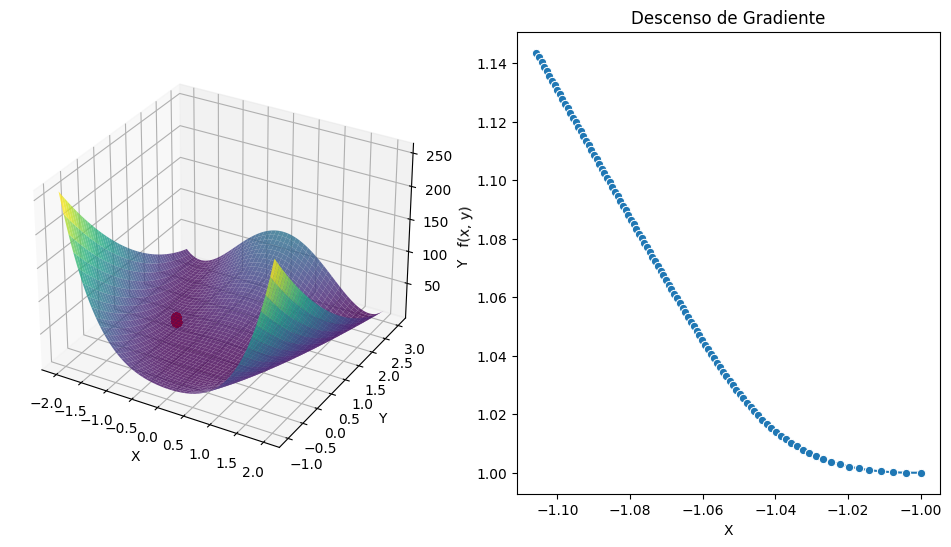

In [40]:
# Crear una gráfica 3D de la función Rosenbrock
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')

x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')

# Agregar la trayectoria del descenso de gradiente a la gráfica 3D
trajectory = np.array(trajectory)
ax.plot(trajectory[:, 0], trajectory[:, 1], rosenbrock(trajectory[:, 0], trajectory[:, 1]), color='r', marker='o')

# Crear una gráfica 2D que muestra la trayectoria del descenso de gradiente
ax2 = fig.add_subplot(122)
sns.lineplot(x=trajectory[:, 0], y=trajectory[:, 1], marker='o')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Descenso de Gradiente')

plt.show()


Como podemos observar, converge  

### Descenso de gradiente con momentum

En el contexto del descenso del gradiente, el "momentum" es una técnica que se utiliza para acelerar la convergencia y reducir oscilaciones en la búsqueda de mínimos en la función de coste.


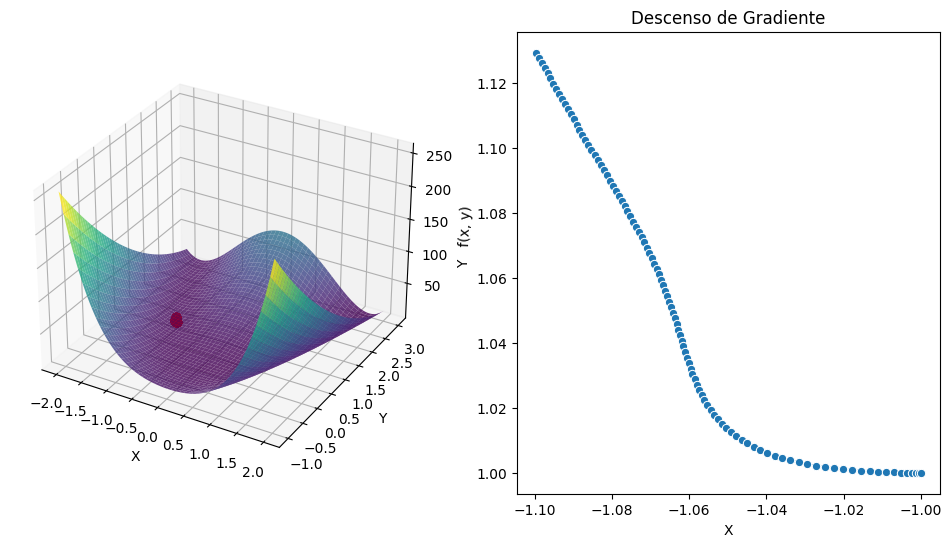

In [41]:
# Descenso de gradiente con momentum
def gradient_descent_with_momentum(alpha, beta, num_iterations):
    x, y = -1, 1
    trajectory = [(x, y)]
    v_x, v_y = 0, 0  # Inicialización del momento
    for i in range(num_iterations):
        grad = gradient(x, y)
        v_x = beta * v_x + (1 - beta) * grad[0]
        v_y = beta * v_y + (1 - beta) * grad[1]
        x -= alpha * v_x
        y -= alpha * v_y
        trajectory.append((x, y))
    return trajectory

# Parámetros para el descenso de gradiente con momentum
alpha = 0.001  # Tasa de aprendizaje
beta = 0.9  # Término de momentum
num_iterations = 100  # Número de iteraciones

# Ejecución del descenso de gradiente con momentum
trajectory_with_momentum = gradient_descent_with_momentum(alpha, beta, num_iterations)


# Crear una gráfica 3D de la función Rosenbrock
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')

x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')

# Agregar la trayectoria del descenso de gradiente a la gráfica 3D
trajectory_with_momentum = np.array(trajectory_with_momentum)
ax.plot(trajectory_with_momentum[:, 0], trajectory_with_momentum[:, 1], rosenbrock(trajectory_with_momentum[:, 0], trajectory_with_momentum[:, 1]), color='r', marker='o')

# Crear una gráfica 2D que muestra la trayectoria del descenso de gradiente
ax2 = fig.add_subplot(122)
sns.lineplot(x=trajectory_with_momentum[:, 0], y=trajectory_with_momentum[:, 1], marker='o')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Descenso de Gradiente')

plt.show()

Tal y como se ha comentado, podemos observar que gracias al momentum la convergencia es más rapida.

### Variantes

Aplicar descenso de gradiente a la función de Booth:
    $$
        f(x,y)= (x+2y-7)^2 +(2x+y-5)^2
    $$
    

Calculamos su gradiente: 
$$∇f(x,y)=[2(x+2y−7)+4(2x+y−5),  4(x+2y−7)+2(2x+y−5)]$$

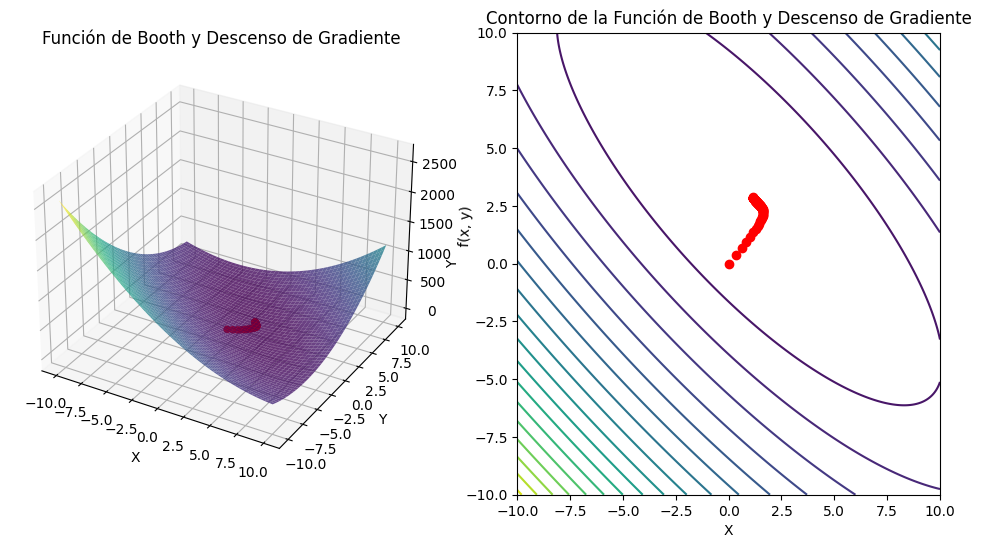

El mínimo valor encontrado es: 0.035175893211443654


In [42]:
# Función de Booth
def booth_function(x, y):
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# Gradiente de la función de Booth
def gradient_booth_function(x, y):
    df_dx = 2 * (x + 2*y - 7) + 4 * (2*x + y - 5)
    df_dy = 4 * (x + 2*y - 7) + 2 * (2*x + y - 5)
    return np.array([df_dx, df_dy])

# Descenso de gradiente
def gradient_descent_booth(starting_point, alpha, num_iterations):
    trajectory = [starting_point]
    x, y = starting_point
    for _ in range(num_iterations):
        grad = gradient_booth_function(x, y)
        x -= alpha * grad[0]
        y -= alpha * grad[1]
        trajectory.append((x, y))
    
    # Calcular el mínimo valor encontrado
    min_value = booth_function(x, y)
    
    return np.array(trajectory), min_value

# Parámetros para el descenso de gradiente
starting_point_booth = [0.0, 0.0]
alpha_booth = 0.01
num_iterations_booth = 100

# Ejecución del descenso de gradiente para la función de Booth
trajectory_booth, min_value_booth = gradient_descent_booth(starting_point_booth, alpha_booth, num_iterations_booth)

# Visualización de la función y la trayectoria del descenso de gradiente para la función de Booth
x_vals_booth = np.linspace(-10, 10, 400)
y_vals_booth = np.linspace(-10, 10, 400)
X_booth, Y_booth = np.meshgrid(x_vals_booth, y_vals_booth)
Z_booth = booth_function(X_booth, Y_booth)

fig_booth = plt.figure(figsize=(12, 6))
ax1_booth = fig_booth.add_subplot(121, projection='3d')
ax1_booth.plot_surface(X_booth, Y_booth, Z_booth, cmap='viridis', alpha=0.8)
ax1_booth.scatter(trajectory_booth[:, 0], trajectory_booth[:, 1], booth_function(trajectory_booth[:, 0], trajectory_booth[:, 1]), color='r', marker='o')
ax1_booth.set_xlabel('X')
ax1_booth.set_ylabel('Y')
ax1_booth.set_zlabel('f(x, y)')
ax1_booth.set_title('Función de Booth y Descenso de Gradiente')

ax2_booth = fig_booth.add_subplot(122)
ax2_booth.contour(X_booth, Y_booth, Z_booth, levels=20, cmap='viridis')
ax2_booth.scatter(trajectory_booth[:, 0], trajectory_booth[:, 1], color='r', marker='o')
ax2_booth.set_xlabel('X')
ax2_booth.set_ylabel('Y')
ax2_booth.set_title('Contorno de la Función de Booth y Descenso de Gradiente')

plt.show()

print(f"El mínimo valor encontrado es: {min_value_booth}")
